In [18]:
words = open('names.txt', 'r').read().splitlines()

In [19]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [20]:
len(words)

32033

In [107]:
b = {}

for w in words:
    chs = ['.'] + list(w) + ['.']
    
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [108]:
sorted_dict = sorted(b.items(), key=lambda x: x[1], reverse=True)

In [109]:
import torch

# Create a set of all the unique characters in the dictionary keys
chars = sorted(list(set(char for tup in b.keys() for char in tup)))

# Create a 2D tensor with all zeros
tensor = torch.zeros((len(chars), len(chars)))

# Fill in the tensor with the dictionary values
for key, value in b.items():
    row = chars.index(key[0])
    col = chars.index(key[1])
    tensor[row][col] = value

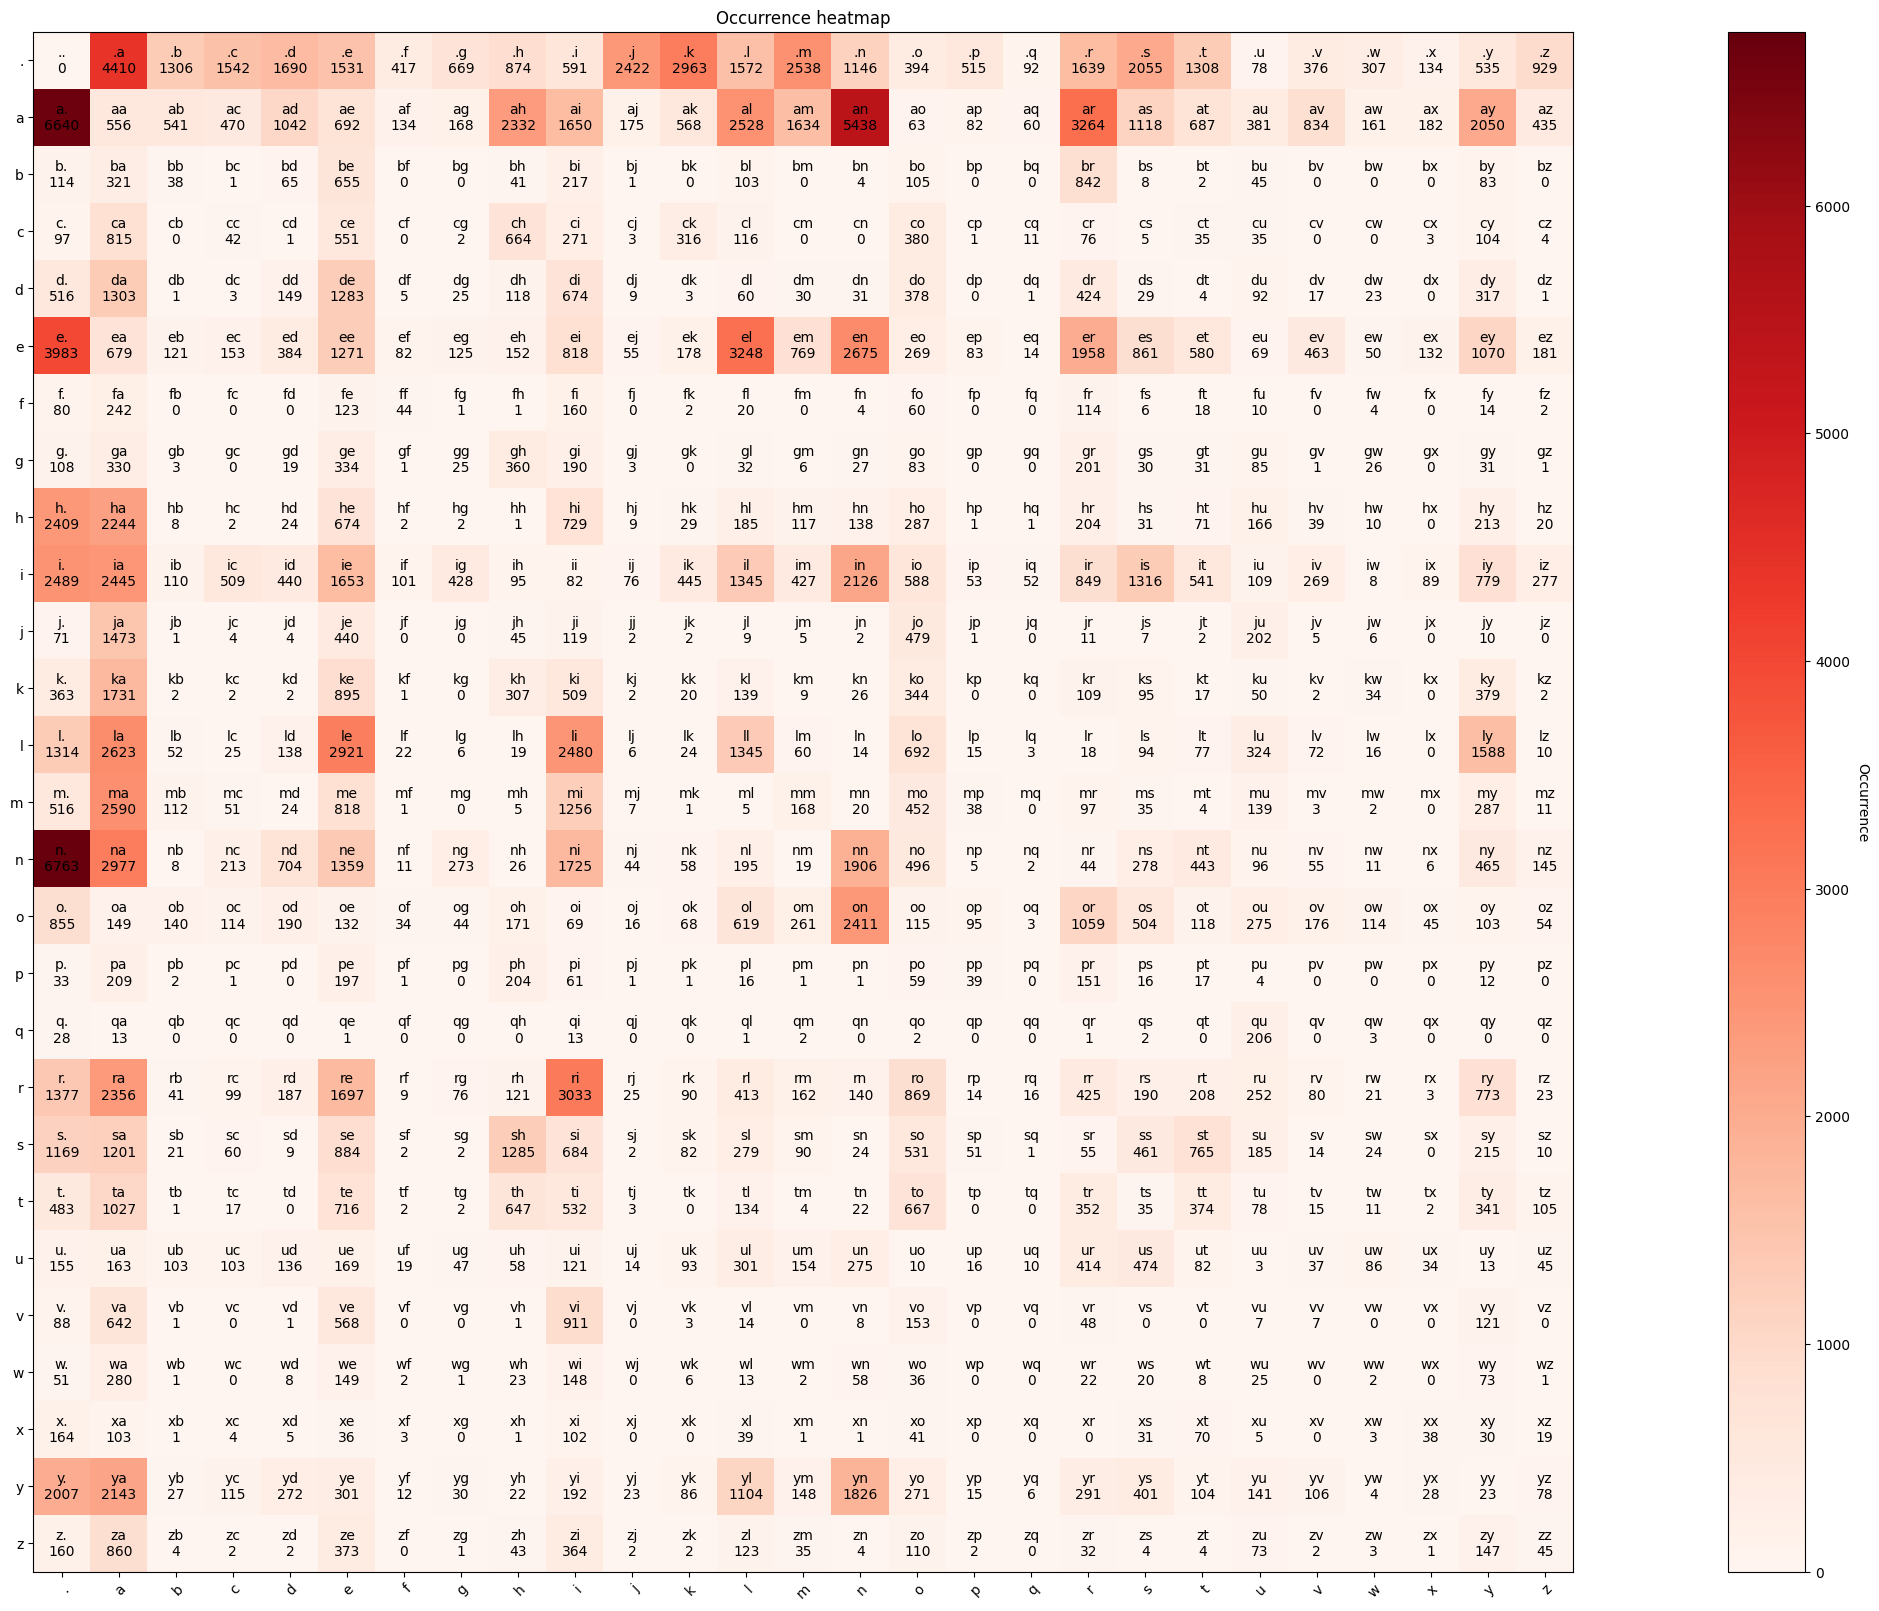

In [110]:
import matplotlib.pyplot as plt

# Create a list of all the unique characters in the dictionary keys
chars = sorted(list(set(char for tup in b.keys() for char in tup)))

# Create a figure with a bigger and wider heatmap
fig, ax = plt.subplots(figsize=(40, 20))

# Add the occurrence values to the heatmap
for i in range(len(chars)):
    for j in range(len(chars)):
        text = ax.text(j, i, chars[i] + chars[j] + "\n" + str(int(tensor[i, j])), ha='center', va='center', color='black')


# Plot the tensor as a heatmap
im = ax.imshow(tensor, cmap='Reds')

# Set the x and y tick positions and labels
ax.set_xticks(range(len(chars)))
ax.set_yticks(range(len(chars)))
ax.set_xticklabels(chars)
ax.set_yticklabels(chars)

# Rotate the x tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add a colorbar and title to the plot
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Occurrence", rotation=-90, va="bottom")
ax.set_title("Occurrence heatmap")

# Show the plot
plt.show()

In [324]:
import string
g = torch.Generator().manual_seed(655555)

P = tensor.sum(1, keepdim=True)
P = tensor / P

for letter in string.ascii_lowercase:
    print("")
    for i in range(1):
        sample = predicted_word = letter

        while sample != '.':
            ind = chars.index(sample)

            p = P[ind]

            sample = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
            sample = chars[sample]

            predicted_word += sample

        print("", predicted_word)


 araylminaylel.

 brsthodo.

 cetas.

 dyreyi.

 e.

 fan.

 gusyllenahorl.

 heme.

 itai.

 jalea.

 ke.

 lureselya.

 mo.

 n.

 och.

 praton.

 qubous.

 ryansrkon.

 shnshallia.

 ty.

 urrim.

 vevamar.

 wynyneyli.

 xalebeshuika.

 yeuso.

 zy.


In [385]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
    print()
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = chars.index(ch1)
        ix2 = chars.index(ch2)
        
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        
        
        log_likelihood += logprob
        n+=1
        
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print()       
print(f"{log_likelihood=}")

nll = -log_likelihood

print(f"{nll=}")
print(f"averageNLL: {nll/n:.4f}")


.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299

.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299

.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299

log_likelihood=tensor(-38.7856)
nll=tensor(38.7856)
averageNLL: 2.4241


. e
e m
m m
m a
a .


In [403]:
xs

tensor([ 0,  5, 13, 13,  1])

In [404]:
ys

tensor([ 5, 13, 13,  1,  0])

In [350]:
import torch.nn.functional as F

In [361]:
xenc = F.one_hot(xs, num_classes=len(chars)).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

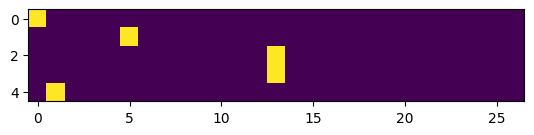

In [362]:
plt.imshow(xenc)

## Bigram LLM

In [551]:
words = open('names.txt', 'r').read().splitlines()

In [552]:
b = {}

for w in words:
    chs = ['.'] + list(w) + ['.']
    
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        
# Create a set of all the unique characters in the dictionary keys
chars = sorted(list(set(char for tup in b.keys() for char in tup)))

In [553]:
# Create a training set for bigrams
xs, ys = [], []

for w in words:

    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = chars.index(ch1)
        ix2 = chars.index(ch2)
        # print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [554]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [555]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [556]:
# Randomly generate a 27 neuron weights. Each neuron recieves 27 inputs
g = torch.Generator().manual_seed(5465465465)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [557]:
epoch = 100

for i in range(epoch):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W # Predict the logits

    # Softmax -> Converts logits to probabilites
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True) 

    # Calculate the loss
    loss = -probs[torch.arange(len(ys)), ys].log().mean()
    # print(loss)
    
    # Backward pass
    W.grad = None # Zero out all the gradients for each node in the computational graph
    loss.backward()
    
    # Update the weights
    W.data += -50 * W.grad

In [558]:
loss

tensor(2.4742, grad_fn=<NegBackward0>)

In [560]:
xenc.shape

torch.Size([228146, 27])

# Trigram LM

In [561]:
words = open('names.txt', 'r').read().splitlines()

In [562]:
t = {}

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)

        t[trigram] = t.get(trigram, 0) + 1
        
# Create a set of all the unique characters in the dictionary keys
chars = sorted(list(set(char for tup in t.keys() for char in tup)))

In [563]:
# Create a training set for Trigrams
xs, ys = [], []

for w in words:

    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = chars.index(ch1)
        ix2 = chars.index(ch2)
        ix3 = chars.index(ch3)
        
        
        xs.append((ix1, ix2))
        ys.append(ix3)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [564]:
xs

tensor([[ 0,  5],
        [ 5, 13],
        [13, 13],
        ...,
        [26, 25],
        [25, 26],
        [26, 24]])

In [565]:
ys

tensor([13, 13,  1,  ..., 26, 24,  0])

In [566]:
# Randomly generate a 27 neuron weights. Each neuron recieves 27 inputs
g = torch.Generator().manual_seed(5465465465)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [567]:
# Step 1: Find the maximum value in the tensor
max_val = torch.max(xs)

# Step 2: Create an empty tensor of the appropriate shape
xenc = torch.zeros((xs.shape[0], max_val+1))

# Step 3: One-hot encode each row of the original tensor
for i in range(xs.shape[0]):
    xenc[i, xs[i]] = 1

# Print the results
print(xenc)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 1., 0., 1.]])


In [570]:
# forward pass
logits = xenc @ W # Predict the logits

In [573]:
logits.shape

torch.Size([196113, 27])

In [571]:
# Softmax -> Converts logits to probabilites
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True) 

In [575]:
probs.shape

torch.Size([196113, 27])

In [576]:
# Calculate the loss
loss = -probs[torch.arange(len(ys)), ys].log().mean()
print(loss)

tensor(4.1431, grad_fn=<NegBackward0>)


In [578]:
epoch = 1000

for i in range(epoch):
    # forward pass
    logits = xenc @ W # Predict the logits

    # Softmax -> Converts logits to probabilites
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True) 

    # Calculate the loss
    loss = -probs[torch.arange(len(ys)), ys].log().mean()
    
    
    # Backward pass
    W.grad = None # Zero out all the gradients for each node in the computational graph
    loss.backward()
    
    # Update the weights
    W.data += -50 * W.grad
    
print(loss)

tensor(2.4666, grad_fn=<NegBackward0>)


### Testing Trigram

In [703]:
def PredictNext(firstTwo):
    # Create a one-hot encoded vector
    trigram_input = [chars.index(each) for each in list(firstTwo)]
    test_enc = torch.zeros((1, 27))
    
    # print('Trigram Input: ', trigram_input)
    
    
    for each in trigram_input:
        test_enc[0, each] = 1

    # print('TestEnc: ', test_enc)
    
    # Predict the logits
    test_logits = test_enc @ W 
    
    # print('Test Logits: ', test_logits)

    # Softmax -> Converts logits to probabilites
    test_counts = test_logits.exp()
    test_probs = test_counts / test_counts.sum(1, keepdims=True)
    
    # print(firstTwo)
    # print('Test Encoding: ', test_enc)
    # print('Test Probs: ', test_probs)

    return chars[test_probs.argmax().item()]

def Complete(firstTwo):
    result = ''

    while result != '.':
        result = PredictNext(firstTwo[-2:])
        firstTwo += result
        
        if len(firstTwo) > 20:
            result = '.'

    return firstTwo

In [704]:
import itertools

def generate_letter_permutations():
    # Define the English alphabet as a list of uppercase letters
    alphabet = list('abcdefghijklmnopqrstuvwxyz')
    
    # Generate all permutations of 2 letters from the alphabet using itertools.permutations
    permutations = list(itertools.permutations(alphabet, 2))
    
    list_of_strings = [x[0] + x[1] for x in permutations]

    
    # Return the list of permutations
    return list_of_strings

p = generate_letter_permutations()

In [726]:
print('Completions: \n---------------\n')

for each in p[:5] + p[50:55] + p[161:166] + p[261:267]:
    print(f'{each}:   {Complete(each)}')

Completions: 
---------------

ab:   abreilan.
ac:   acha.
ad:   adne.
ae:   aellellellellellellel
af:   afrian.
ca:   cah.
cb:   cberian.
cd:   cdellellellellellelle
ce:   cellellellellellellel
cf:   cferian.
gm:   gmaina.
gn:   gne.
go:   gonna.
gp:   gperian.
gq:   gquisah.
km:   kmaina.
kn:   kna.
ko:   konna.
kp:   kperian.
kq:   kqeulian.
kr:   krian.
